In [1]:
import yfinance as yf
import pandas as pd

In [86]:
def getVariation():
    dfVariacao = pd.DataFrame(columns=['year'])
    tickers=[
        'PETR4.SA',
        'WEGE3.SA',
        'ITSA4.SA',
        'KNRI11.SA',
        'HGRE11.SA',
        'HGLG11.SA',
        'SAAG11.SA',
        'BCFF11.SA',
        'PSSA3.SA',
        'ABEV3.SA',
        'TRXL11.SA',
        'AGCX11.SA',
        'BBDC4.SA',
        'FLRY3.SA',
        'VALE3.SA',
        'PETR3.SA',
        #'SAPR11.SA',
        'ELPL3.SA',
        'GRND3.SA',
        'SAPR3.SA'        
    ]
    for ticker in tickers:
        print(ticker)
        df=yf.Ticker(ticker).history(period='max')
        df.reset_index(inplace=True)
        df['year']=df.Date.dt.year
        df2=df.groupby('year', as_index=False)['Open'].first()
        df3=df.groupby('year', as_index=False)['Close'].last()
        df=df2.merge(df3)
        df['variation']=df['Close']/df['Open']-1    
        
        dfAux=pd.DataFrame()
        dfAux['year']=df['year']
        dfAux[ticker]=df['variation']
        if len(dfVariacao)==0:
            dfVariacao=dfAux
        else:
            dfVariacao=dfVariacao.merge(dfAux, how='left')
        #print(dfVariacao.head())
    dfVariacao.set_index(['year'], inplace=True)
    return dfVariacao
    


In [167]:
def getClose():
    dfVariacao = pd.DataFrame(columns=['year'])
    tickers=[
        'PETR4.SA',
        'WEGE3.SA',
        'ITSA4.SA',
        'KNRI11.SA',
        'HGRE11.SA',
        'HGLG11.SA',
        'SAAG11.SA',
        #'BCFF11.SA',
        'PSSA3.SA',
        'ABEV3.SA',
        'TRXL11.SA',
        'AGCX11.SA',
        'BBDC4.SA',
        'FLRY3.SA',
        'VALE3.SA',
        'PETR3.SA',
        #'SAPR11.SA',
        'ELPL3.SA',
        'GRND3.SA',
        'SAPR3.SA'        
    ]
    tickers=[
        'PETR4.SA',
        'WEGE3.SA',
        'ITSA4.SA',
        'KNRI11.SA',
        'HGRE11.SA',
        'HGLG11.SA',
        'SAAG11.SA',
        #'BCFF11.SA',
        'PSSA3.SA',
        'ABEV3.SA'
    ]
    for ticker in tickers:
        print(ticker)
        df=yf.Ticker(ticker).history(period='max')
        df.reset_index(inplace=True)
        df['year']=df.Date.dt.year
        df=df.groupby('year', as_index=False)['Close'].last()
        
        dfAux=pd.DataFrame()
        dfAux['year']=df['year']
        dfAux[ticker]=df['Close'].pct_change()
        if len(dfVariacao)==0:
            dfVariacao=dfAux
        else:
            dfVariacao=dfVariacao.merge(dfAux, how='left')
        #print(dfVariacao.head())
    dfVariacao.set_index(['year'], inplace=True)
    return dfVariacao
    


In [168]:
df=getClose()
df=df[-4:-1]

PETR4.SA
WEGE3.SA
ITSA4.SA
KNRI11.SA
HGRE11.SA
HGLG11.SA
SAAG11.SA
PSSA3.SA
ABEV3.SA


In [169]:
df


,PETR4.SA,WEGE3.SA,ITSA4.SA,KNRI11.SA,HGRE11.SA,HGLG11.SA,SAAG11.SA,PSSA3.SA,ABEV3.SA
year,,,,,,,,,
2016,1.219403,0.071503,0.450820,0.324412,0.098418,0.104517,0.376107,-0.023333,-0.047742
2017,0.082717,0.594327,0.360346,0.158944,0.305591,0.401910,0.089029,0.413006,0.334129
2018,0.469552,-0.040151,0.330682,-0.111125,0.037153,0.034103,0.013466,0.590329,-0.253653


In [170]:

returns_annual = df.mean()

# get daily and covariance of returns of the stock
cov_annual = df.cov()

In [195]:
import numpy as np
selected=[
        'PETR4.SA',
        'WEGE3.SA',
        'ITSA4.SA',
        'KNRI11.SA',
        'HGRE11.SA',
        'HGLG11.SA',
        'SAAG11.SA',
        'PSSA3.SA',
        'ABEV3.SA'
    ]
port_returns = []
port_volatility = []
stock_weights = []

# set the number of combinations for imaginary portfolios
num_assets = len(selected)
num_portfolios = 5000

# populate the empty lists with each portfolios returns,risk and weights
for single_portfolio in range(num_portfolios):
    weights = np.random.random(num_assets)
    weights /= np.sum(weights)
    returns = np.dot(weights, returns_annual)
    volatility = np.sqrt(np.dot(weights.T, np.dot(cov_annual, weights)))
    port_returns.append(returns)
    port_volatility.append(volatility)
    stock_weights.append(weights)

# a dictionary for Returns and Risk values of each portfolio
portfolio = {'Returns': port_returns,
             'Volatility': port_volatility}

# extend original dictionary to accomodate each ticker and weight in the portfolio
for counter,symbol in enumerate(selected):
    portfolio[symbol+' weight'] = [weight[counter] for weight in stock_weights]

# make a nice dataframe of the extended dictionary
df = pd.DataFrame(portfolio)

# get better labels for desired arrangement of columns
column_order = ['Returns', 'Volatility'] + [stock+' weight' for stock in selected]

# reorder dataframe columns
df = df[column_order]
max_ret=df['Returns'].max()
max_vol=df['Volatility'].min()
df.head()

,Returns,Volatility,PETR4.SA weight,WEGE3.SA weight,ITSA4.SA weight,KNRI11.SA weight,HGRE11.SA weight,HGLG11.SA weight,SAAG11.SA weight,PSSA3.SA weight,ABEV3.SA weight
0,0.281128,0.134868,0.232805,0.132901,0.161724,0.063055,0.190425,0.019363,0.020970,0.030908,0.147849
1,0.206257,0.096342,0.061950,0.100010,0.023197,0.144072,0.119288,0.093647,0.259928,0.139562,0.058346
2,0.241560,0.116273,0.013386,0.173883,0.166590,0.158197,0.096461,0.176951,0.010074,0.204107,0.000350
3,0.273631,0.086111,0.186728,0.109281,0.131559,0.032516,0.164161,0.044622,0.052631,0.135682,0.142821
4,0.227533,0.157271,0.187231,0.175509,0.008575,0.160379,0.153233,0.161492,0.016789,0.004413,0.132379


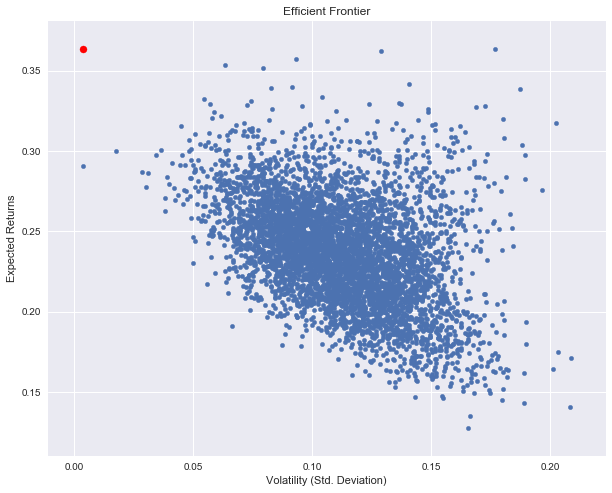

In [196]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn')
df.plot.scatter(x='Volatility', y='Returns', figsize=(10, 8), grid=True)
plt.xlabel('Volatility (Std. Deviation)')
plt.ylabel('Expected Returns')
plt.title('Efficient Frontier')
plt.scatter(max_vol, max_ret,c='red', s=50) # red dot
plt.show()

In [157]:
df[1:100].to_csv('mark1.csv',sep=';',decimal=',')

In [193]:
max_ret
max_vol

0.2234699974544542